<a href="https://www.kaggle.com/code/themeeemul/youtube-spotify-eda-and-views-prediction?scriptVersionId=133529655" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/spotify-and-youtube/Spotify_Youtube.csv


<div class="alert alert-block alert-success" style='font-size:25px'>
<b>Hi!</b> If you like this notebook, an <font color="Blue"><b>Upvote</b></font> would be great ! 😊 <br>
    Please <font color="BLUE"><b>comments</b></font> me your <font color="BLUE"><b>feedbacks</b></font> to help me improve myself.  <br>  
     Thanks for your time.
</div>

In [2]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline 
import matplotlib as mpl
from matplotlib.ticker import NullFormatter

import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

print(plt.style.available)
mpl.style.use(['ggplot'])

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


# <div style='color:blue'>Data Pre-Processing<div>

In [3]:
df  = pd.read_csv('/kaggle/input/spotify-and-youtube/Spotify_Youtube.csv',index_col=0)
df.head(5)

,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,-6.679,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,-5.815,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,-3.930,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,-5.810,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,-8.627,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


In [4]:
df.describe()

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
count,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,2.071600e+04,2.024800e+04,2.017700e+04,2.014900e+04,2.014200e+04
mean,0.619777,0.635250,5.300348,-7.671680,0.096456,0.291535,0.055962,0.193521,0.529853,120.638340,2.247176e+05,9.393782e+07,6.633411e+05,2.751899e+04,1.359422e+08
std,0.165272,0.214147,3.576449,4.632749,0.111960,0.286299,0.193262,0.168531,0.245441,29.579018,1.247905e+05,2.746443e+08,1.789324e+06,1.932347e+05,2.441321e+08
min,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,0.000000e+00,0.000000e+00,0.000000e+00,6.574000e+03
25%,0.518000,0.507000,2.000000,-8.858000,0.035700,0.045200,0.000000,0.094100,0.339000,97.002000,1.800095e+05,1.826002e+06,2.158100e+04,5.090000e+02,1.767486e+07
50%,0.637000,0.666000,5.000000,-6.536000,0.050500,0.193000,0.000002,0.125000,0.537000,119.965000,2.132845e+05,1.450110e+07,1.244810e+05,3.277000e+03,4.968298e+07
75%,0.740250,0.798000,8.000000,-4.931000,0.103000,0.477250,0.000463,0.237000,0.726250,139.935000,2.524430e+05,7.039975e+07,5.221480e+05,1.436000e+04,1.383581e+08
max,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,8.079649e+09,5.078865e+07,1.608314e+07,3.386520e+09


## Checking the dataset for missing values and etc

In [5]:
missing = []
unique = []
types = []
variables = []
count = []

for item in df.columns:
    variables.append(item)
    missing.append(df[item].isnull().sum())
    unique.append(df[item].nunique())
    types.append(df[item].dtypes)
    count.append(len(df[item]))
    
output = pd.DataFrame({
    'variable': variables, 
    'dtype': types,
    'count': count,
    'unique': unique,
    'missing': missing, 
   
})   
output.sort_values("missing",ascending=False).reset_index(drop=True)

,variable,dtype,count,unique,missing
0,Description,object,20718,17395,876
1,Stream,float64,20718,18461,576
2,Comments,float64,20718,10485,569
3,Likes,float64,20718,17939,541
4,official_video,object,20718,2,470
5,Licensed,object,20718,2,470
6,Views,float64,20718,19245,470
7,Channel,object,20718,6714,470
8,Title,object,20718,18146,470
9,Url_youtube,object,20718,18154,470


In [6]:
# Lets see the statistical numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Danceability,20716.0,6.197775e-01,1.652724e-01,0.000000,5.180000e-01,6.370000e-01,7.402500e-01,9.750000e-01
Energy,20716.0,6.352503e-01,2.141468e-01,0.000020,5.070000e-01,6.660000e-01,7.980000e-01,1.000000e+00
Key,20716.0,5.300348e+00,3.576449e+00,0.000000,2.000000e+00,5.000000e+00,8.000000e+00,1.100000e+01
Loudness,20716.0,-7.671680e+00,4.632749e+00,-46.251000,-8.858000e+00,-6.536000e+00,-4.931000e+00,9.200000e-01
Speechiness,20716.0,9.645601e-02,1.119600e-01,0.000000,3.570000e-02,5.050000e-02,1.030000e-01,9.640000e-01
Acousticness,20716.0,2.915353e-01,2.862988e-01,0.000001,4.520000e-02,1.930000e-01,4.772500e-01,9.960000e-01
Instrumentalness,20716.0,5.596156e-02,1.932620e-01,0.000000,0.000000e+00,2.405000e-06,4.630000e-04,1.000000e+00
Liveness,20716.0,1.935210e-01,1.685309e-01,0.014500,9.410000e-02,1.250000e-01,2.370000e-01,1.000000e+00
Valence,20716.0,5.298533e-01,2.454408e-01,0.000000,3.390000e-01,5.370000e-01,7.262500e-01,9.930000e-01
Tempo,20716.0,1.206383e+02,2.957902e+01,0.000000,9.700200e+01,1.199650e+02,1.399350e+02,2.433720e+02


In [7]:
# To make the dataset more relaiable based on the real world
# I decide to drop all missing values
df.dropna(axis=0,inplace=True)


In [8]:
# Also Checking for the duplicate values
df.duplicated().sum()

0

# Exploratory Data Analysis (EDA)

## Lets see the total of album types and the views

Text(0.5, 0.98, 'Total album types')

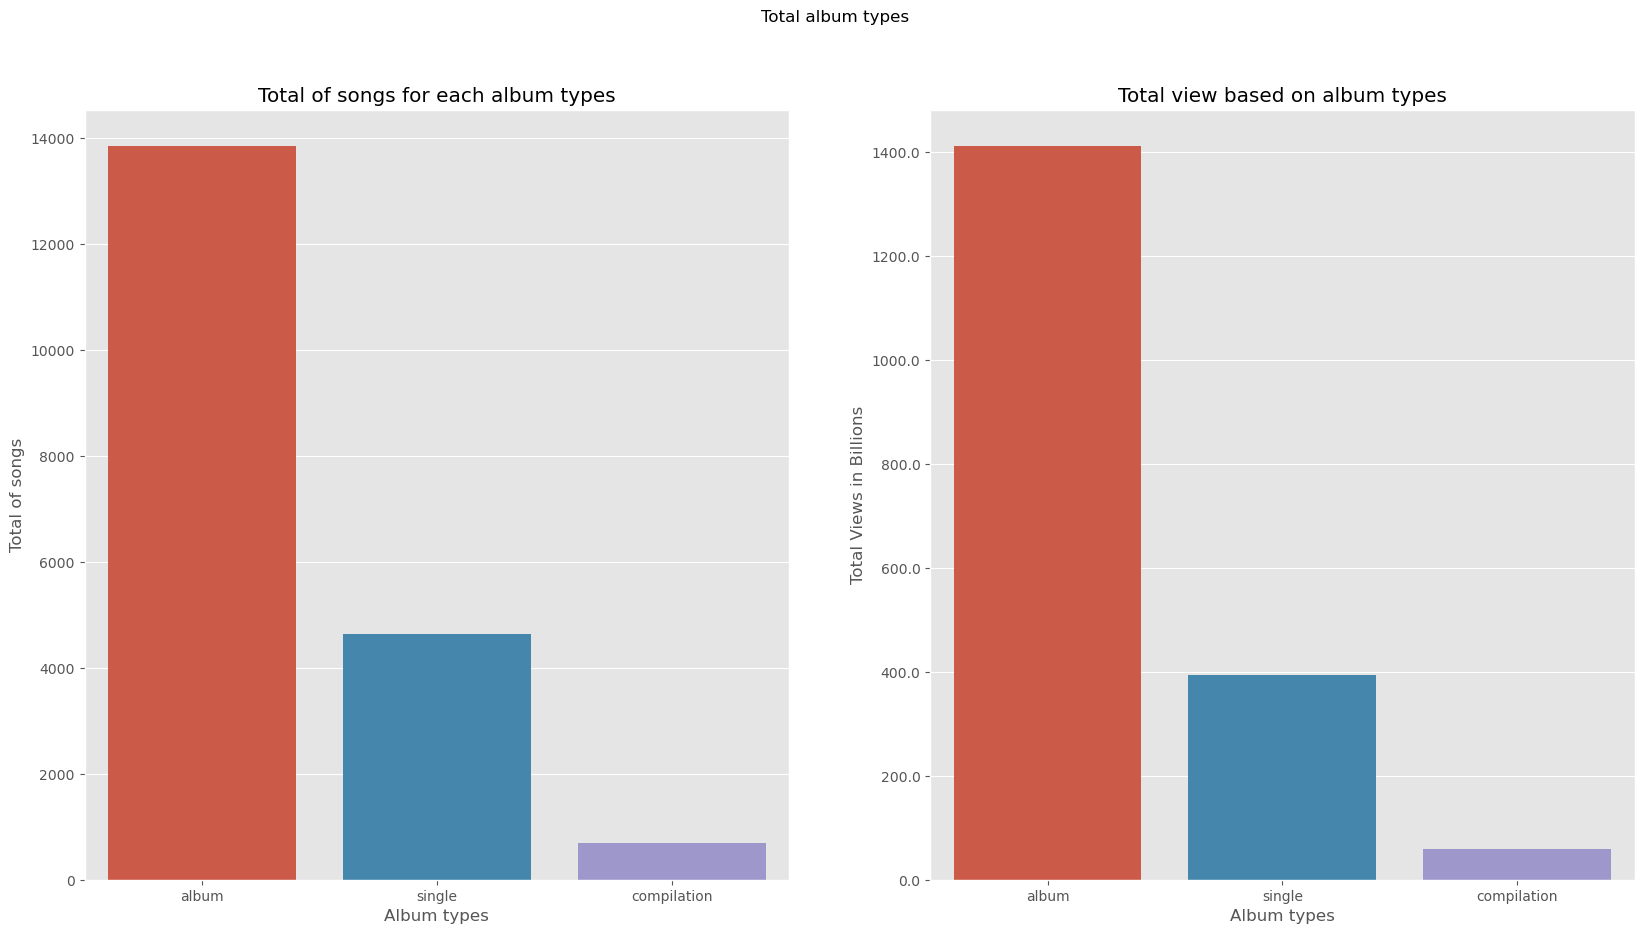

In [9]:
def formatter(x, pos):
    return str(round(x / 1e9, 1))
def millformatter(x, pos):
    return str(round(x / 1e6, 1)) 

fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,sharex=True,figsize=(20,10))

sns.countplot(df,x='Album_type',ax=ax1)
ax1.set_title("Total of songs for each album types")
ax1.set_ylabel("Total of songs")
ax1.set_xlabel("Album types")


most_view_album = df.groupby('Album_type').sum().sort_values('Views',ascending=False).reset_index()
sns.barplot(most_view_album,y='Views',x='Album_type',ax=ax2)

ax2.set_title("Total view based on album types")
ax2.set_ylabel("Total Views in Billions")
ax2.set_xlabel("Album types")
ax2.yaxis.set_major_formatter(formatter)
ax2.yaxis.set_minor_formatter(NullFormatter())

fig.suptitle("Total album types")

## Which track have the most view and likes on Youtube and stream on Spotify

Text(0.5, 0.98, 'Top 10 of track')

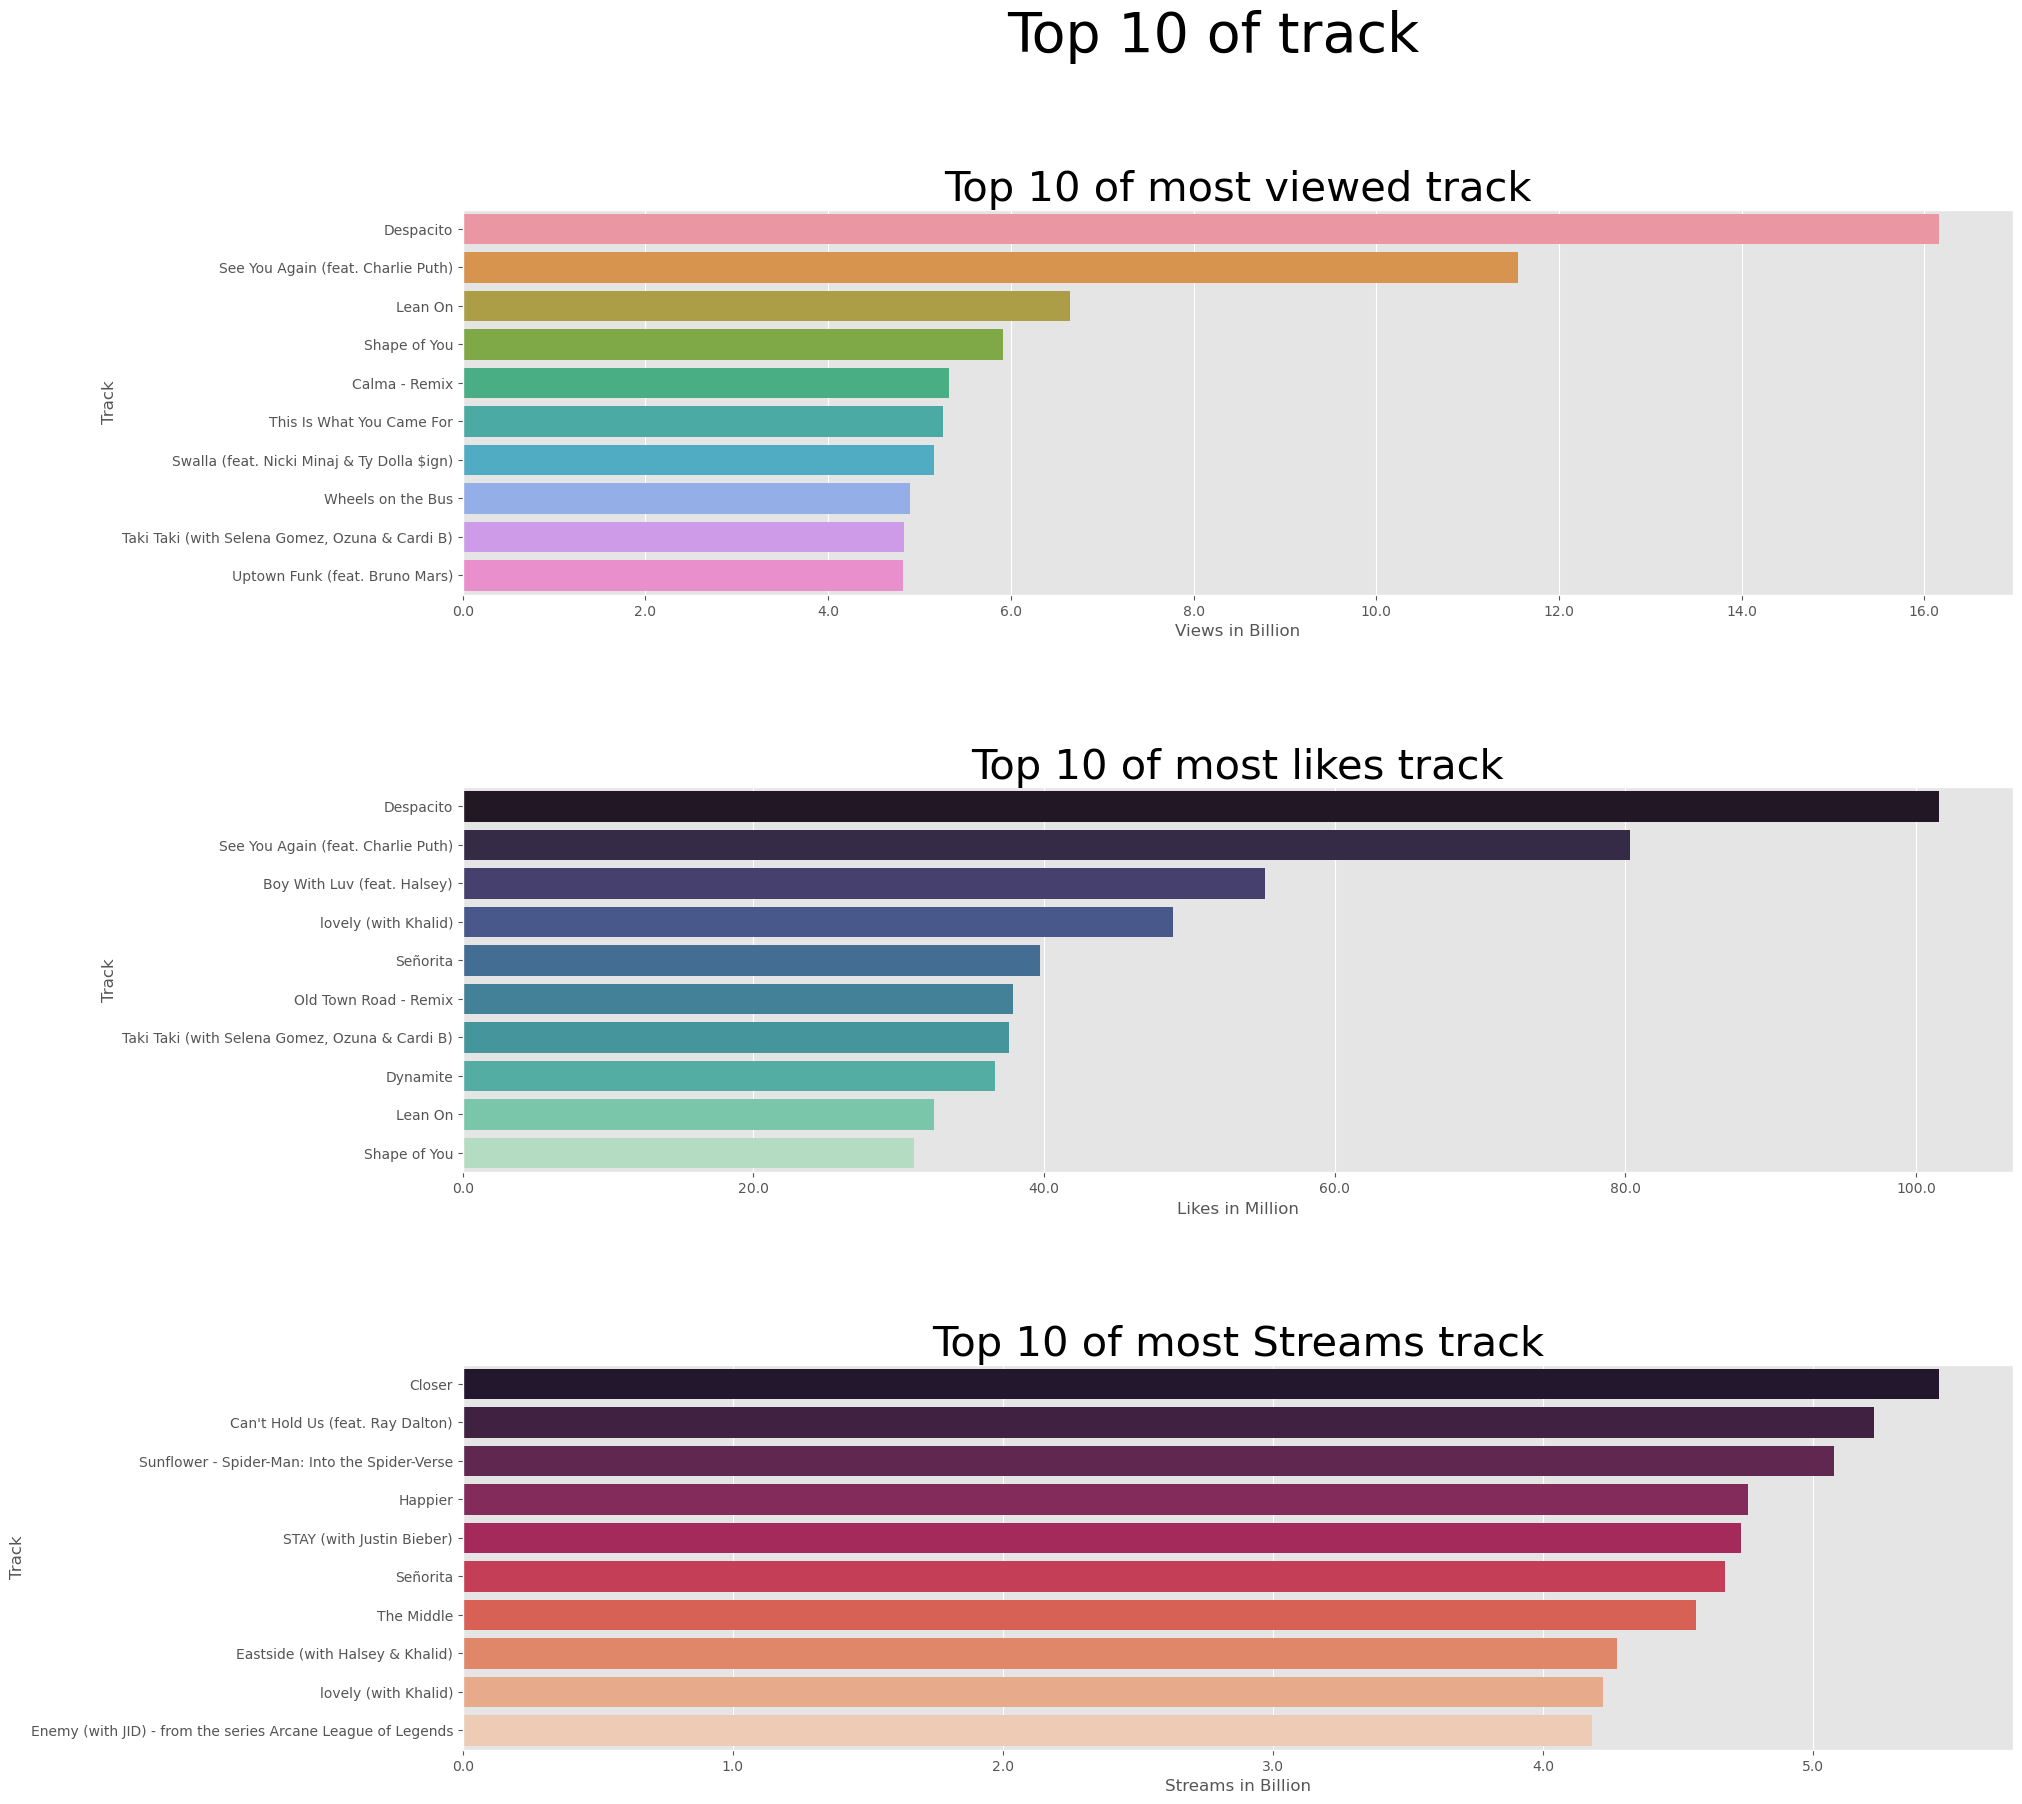

In [10]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=3,ncols=1,figsize= (20,20))
fig.subplots_adjust(hspace=0.5)
most_view_track = df.groupby('Track').sum().sort_values('Views',ascending=False).reset_index().head(10)
sns.barplot(most_view_track,x='Views',y='Track',ax=ax1)

ax1.set_title("Top 10 of most viewed track",fontsize=30)
ax1.set_xlabel("Views in Billion")
ax1.xaxis.set_major_formatter(formatter)
ax1.yaxis.set_minor_formatter(NullFormatter())


most_likes_track = df.groupby('Track').sum().sort_values('Likes',ascending=False).reset_index().head(10)
sns.barplot(most_likes_track,x='Likes',y='Track',palette='mako',ax=ax2)

ax2.set_title("Top 10 of most likes track",fontsize=30)
ax2.set_xlabel("Likes in Million")
ax2.xaxis.set_major_formatter(millformatter)
ax2.yaxis.set_minor_formatter(NullFormatter())

most_stream_track = df.groupby('Track').sum().sort_values('Stream',ascending=False).reset_index().head(10)
sns.barplot(most_stream_track,x='Stream',y='Track',palette='rocket',ax=ax3)

ax3.set_title("Top 10 of most Streams track",fontsize=30)
ax3.set_xlabel("Streams in Billion")
ax3.xaxis.set_major_formatter(formatter)
ax3.yaxis.set_minor_formatter(NullFormatter())

fig.suptitle("Top 10 of track",fontsize=40)

## Artist with the most stream and viewed 

Text(0.5, 0.98, 'Artist with the most stream and views')

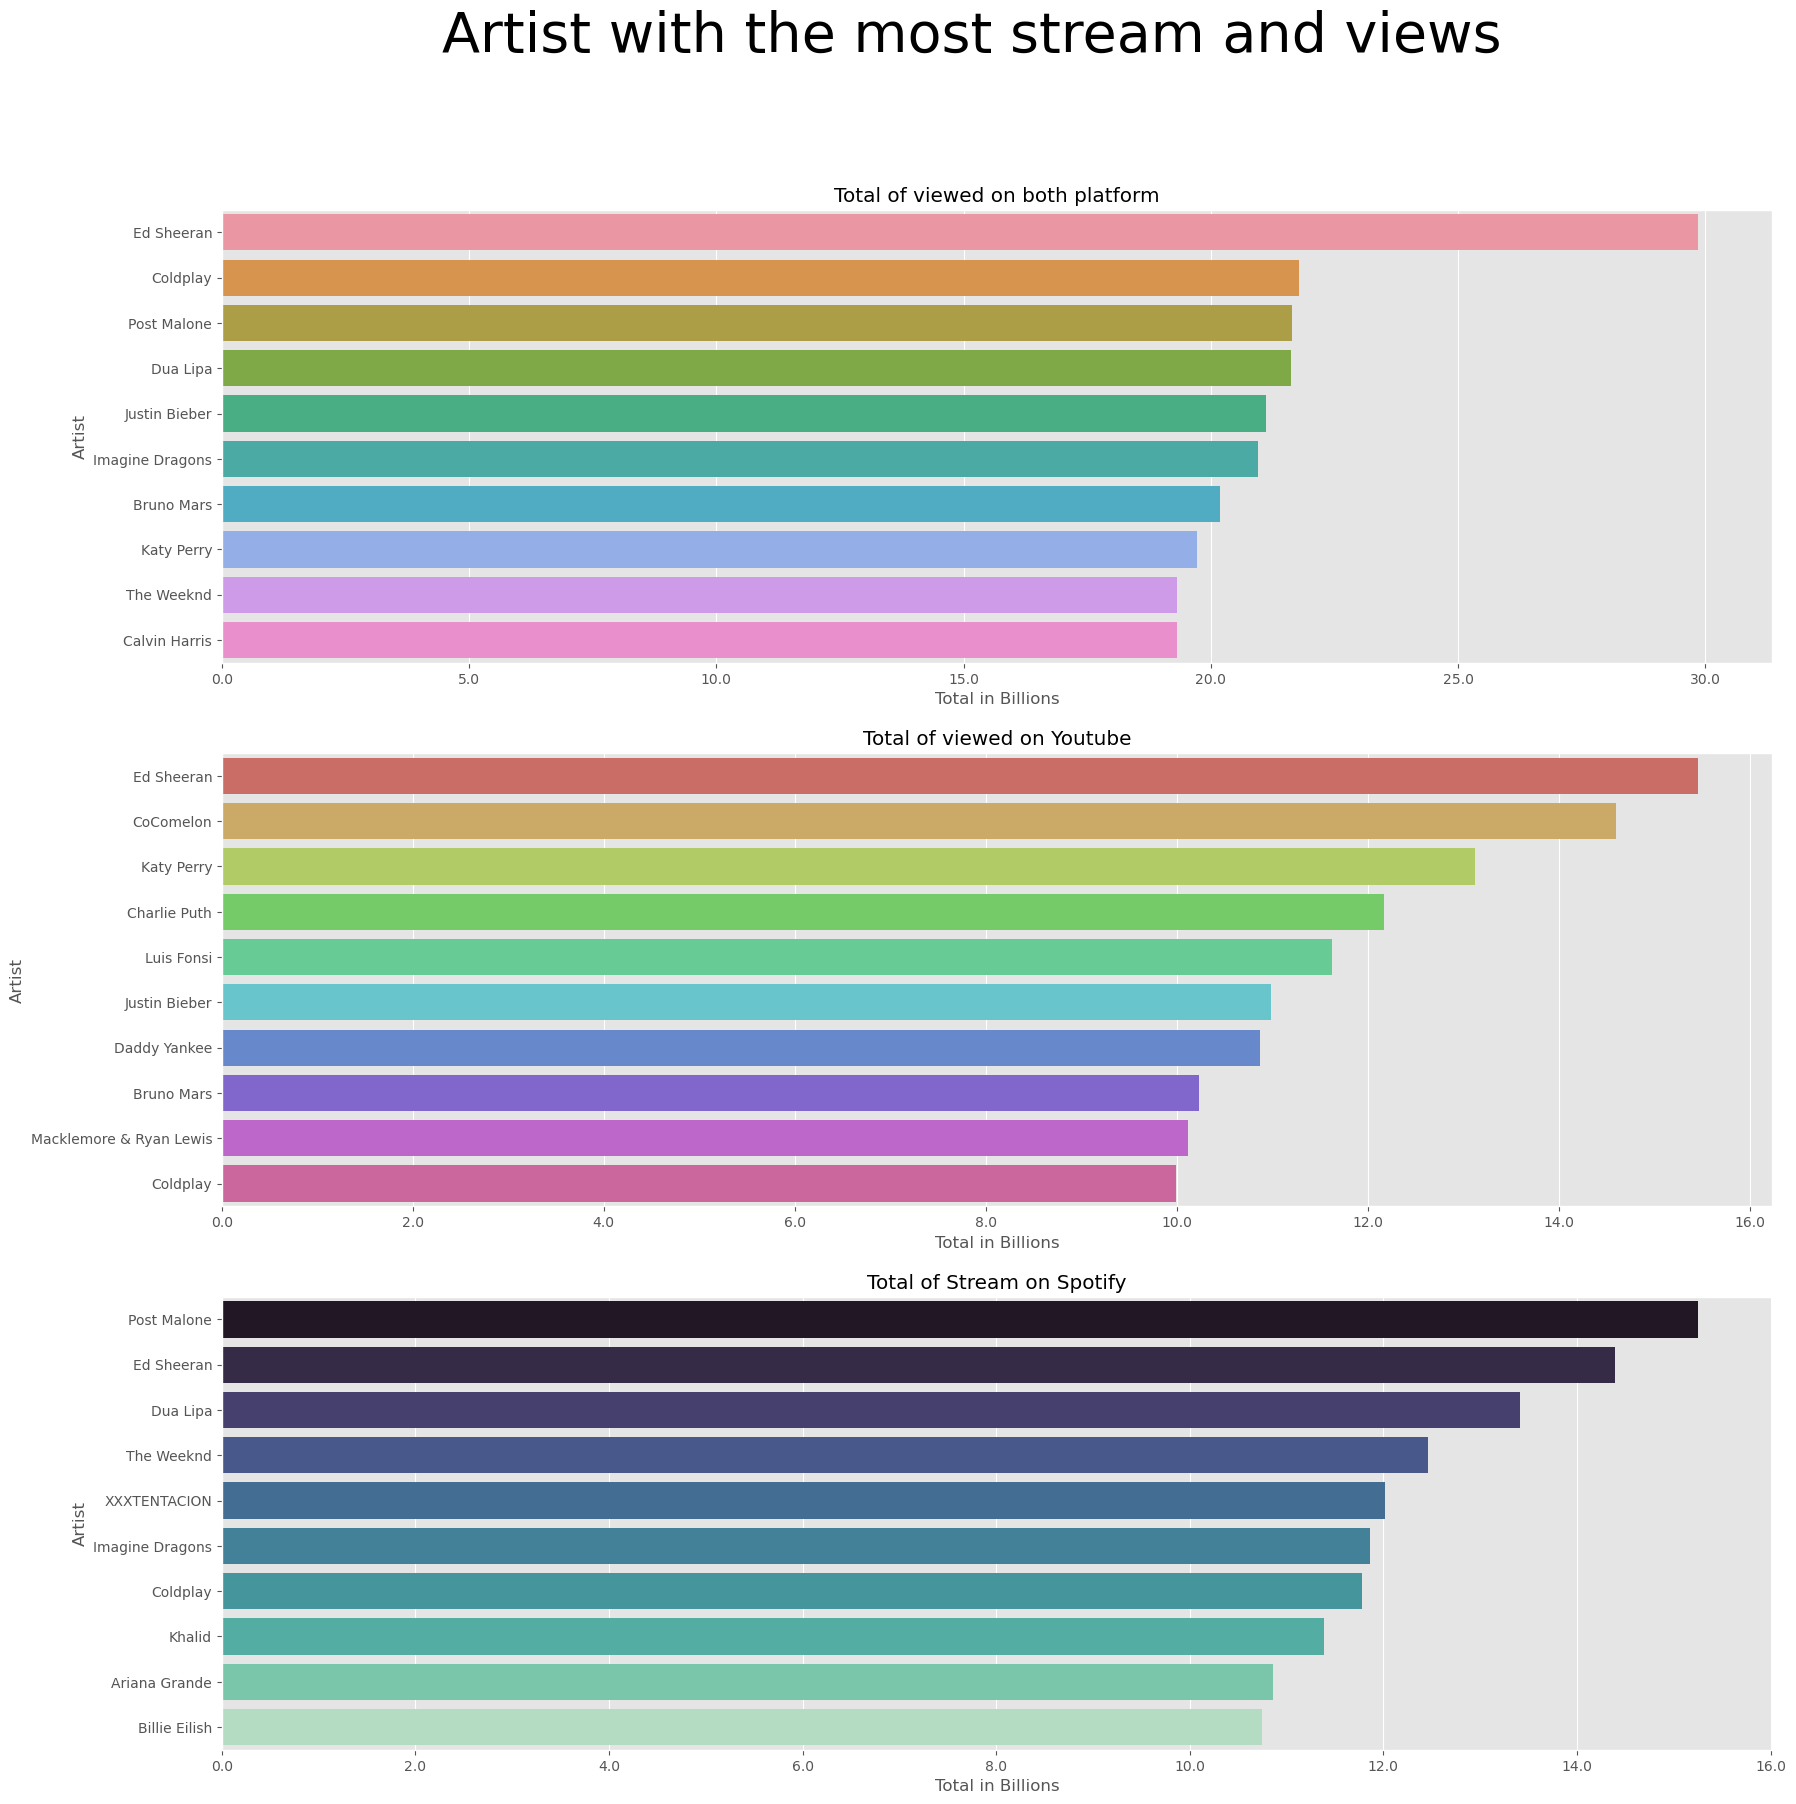

In [11]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=3,ncols=1,figsize=(20,20))




most_popular_artist = df.groupby('Artist').sum()
most_popular_artist['TotalListened'] = most_popular_artist['Views'] +most_popular_artist['Stream']
most_popular_artist = most_popular_artist.sort_values('TotalListened',ascending=False).reset_index().head(10)

sns.barplot(most_popular_artist,y='Artist',x='TotalListened',ax=ax1)
ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_minor_formatter(NullFormatter())
ax1.set_xlabel("Total in Billions")
ax1.set_title("Total of viewed on both platform")

# Youtube

most_popular_artist_youtube = df.groupby('Artist').sum().sort_values('Views',ascending=False).reset_index().head(10)

sns.barplot(most_popular_artist_youtube,y='Artist',x='Views',palette='hls',ax=ax2)
ax2.xaxis.set_major_formatter(formatter)
ax2.xaxis.set_minor_formatter(NullFormatter())
ax2.set_xlabel("Total in Billions")
ax2.set_title("Total of viewed on Youtube")

# Spotify

most_popular_artist_spotify = df.groupby('Artist').sum().sort_values('Stream',ascending=False).reset_index().head(10)

sns.barplot(most_popular_artist_spotify,y='Artist',x='Stream',palette='mako',ax=ax3)
ax3.xaxis.set_major_formatter(formatter)
ax3.xaxis.set_minor_formatter(NullFormatter())
ax3.set_xlabel("Total in Billions")
ax3.set_title("Total of Stream on Spotify")

fig.suptitle("Artist with the most stream and views",fontsize=40)

We can see that the most track was listened is by Ed Sheeran on Both Platform
## So Lets see what most track that popular by Ed Sheeran

Text(0.5, 1.0, 'Most popular track by Ed Sheeran')

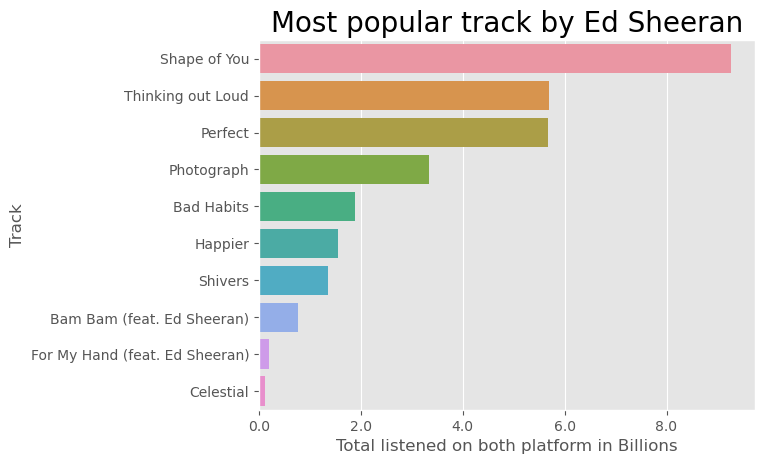

In [12]:
ed_sheeran = df.groupby(['Artist','Track']).sum().reset_index()
ed_sheeran = ed_sheeran[ed_sheeran['Artist'] == 'Ed Sheeran']
ed_sheeran['TotalListened'] = ed_sheeran.Views  + ed_sheeran.Stream
ed_sheeran = ed_sheeran.sort_values('TotalListened',ascending=False)

fig = sns.barplot(ed_sheeran,x='TotalListened',y='Track')
fig.xaxis.set_major_formatter(formatter)
fig.set_xlabel("Total listened on both platform in Billions")
fig.set_title("Most popular track by Ed Sheeran",fontsize=20)

## The most popular video with high of Danceability on Youtube
Danceability: describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

Text(0.5, 0, 'Total views in Billions')

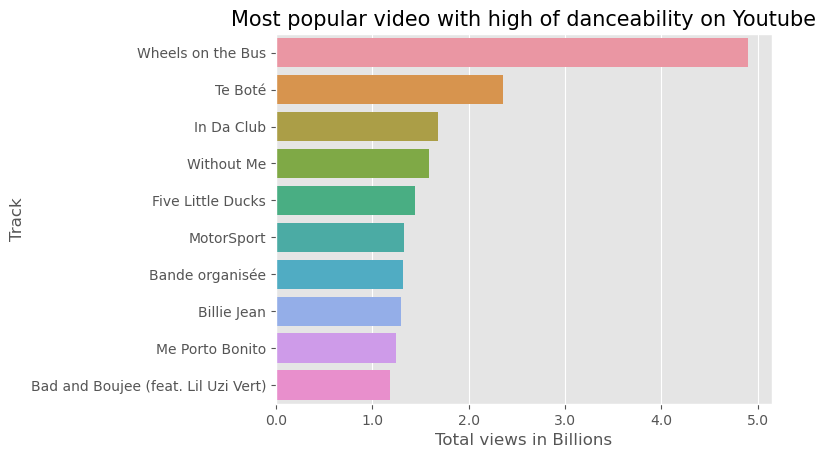

In [13]:
danceability_track = df.groupby(['Track','Danceability']).sum().reset_index()
danceability_track = danceability_track[danceability_track['Danceability'] > 0.9]\
.sort_values('Views',ascending=False).head(10)

fig = sns.barplot(danceability_track,y='Track',x='Views')
fig.set_title("Most popular video with high of danceability on Youtube",fontsize=15)
fig.xaxis.set_major_formatter(formatter)
fig.set_xlabel("Total views in Billions")

## Lets see what the most viewed cheerfull track and sad track on Spotify

Valence : a measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

Text(0.5, 0.98, 'Most viewed track on happy and sad vibes')

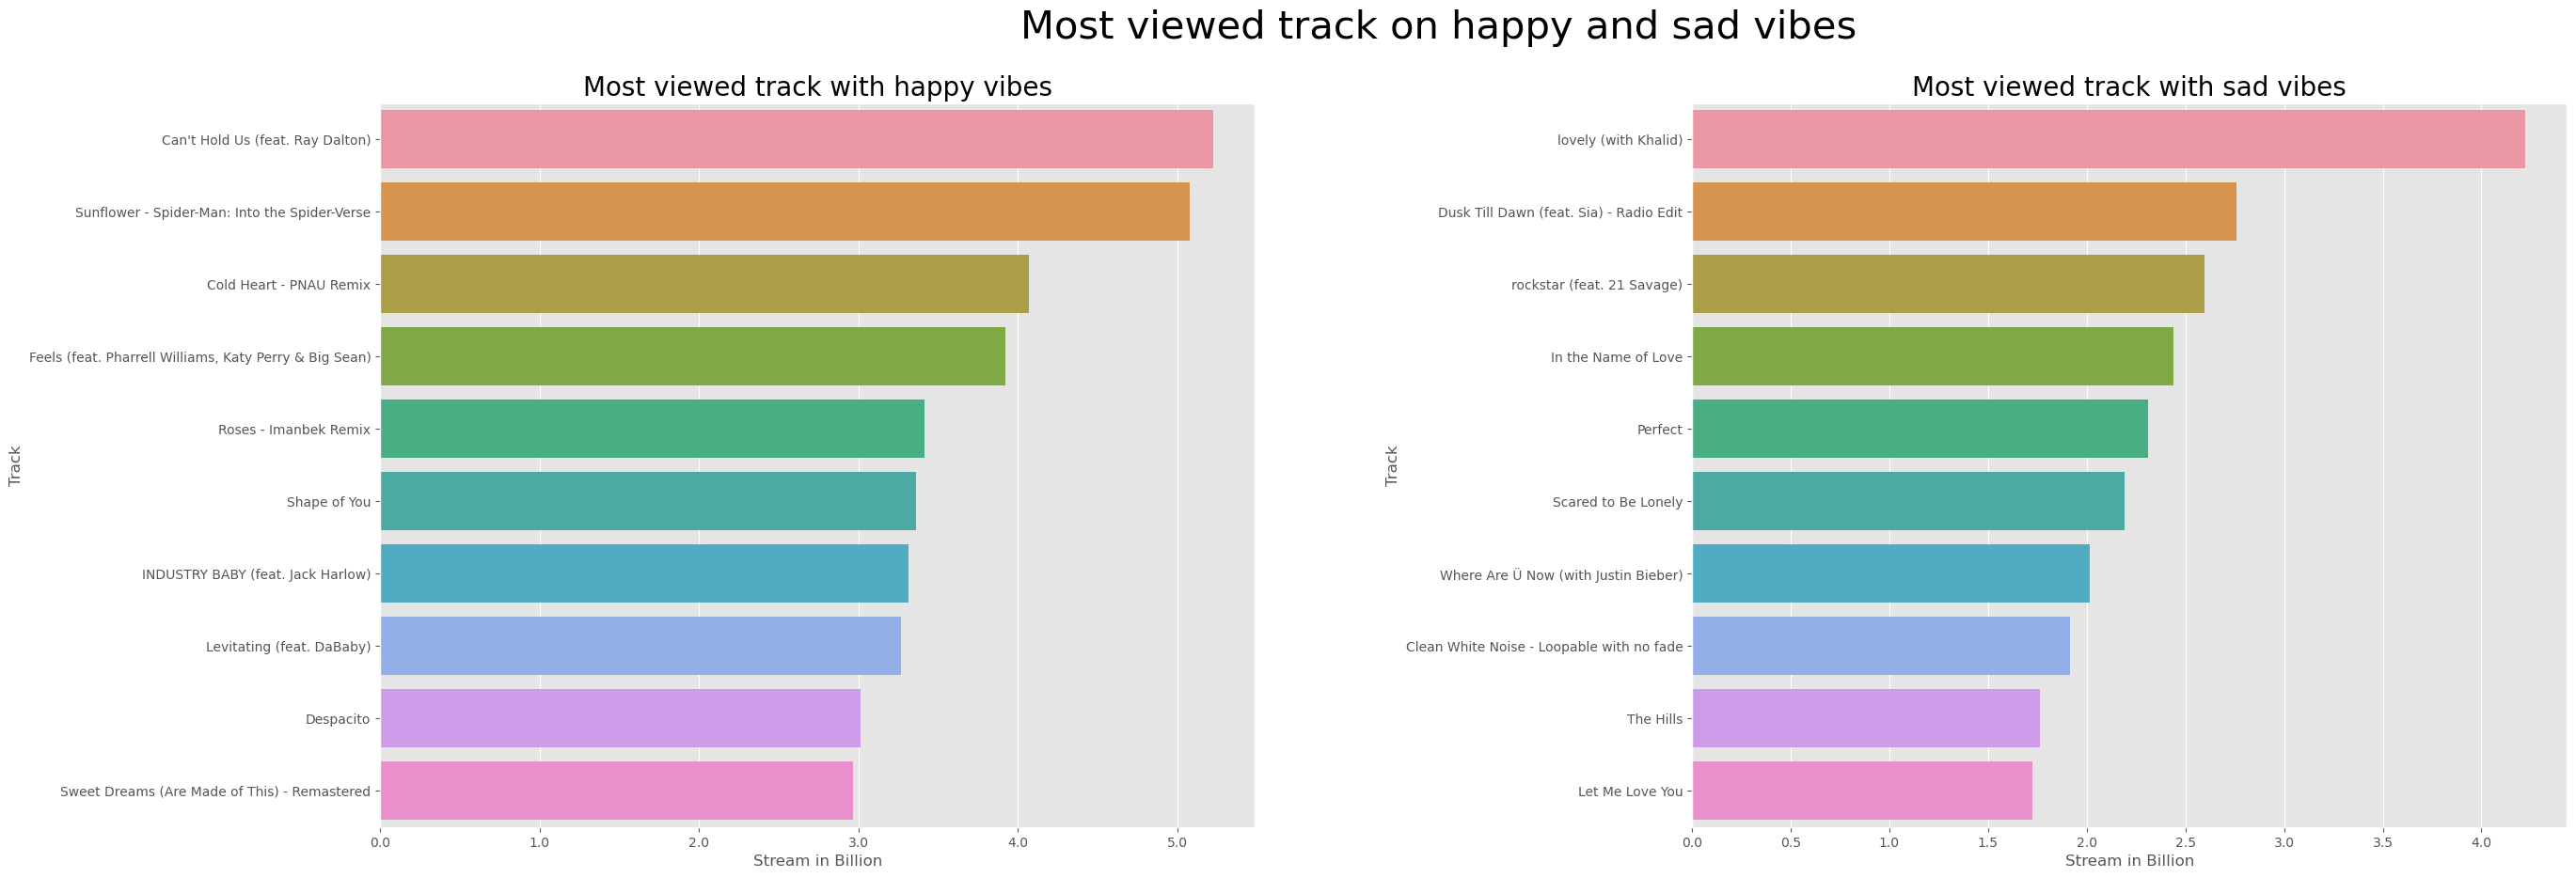

In [14]:
fig ,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(30,10))
fig.subplots_adjust(wspace=0.5)
# Valence with score above 0.8

happy_track = df.groupby(['Track','Valence']).sum().sort_values('Stream',ascending=False).reset_index()
happy_track = happy_track[happy_track['Valence']>0.8].head(10)

sns.barplot(happy_track,x='Stream',y='Track',ax=ax1)
ax1.set_title("Most viewed track with happy vibes",fontsize=20)
ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_minor_formatter(NullFormatter())
ax1.set_xlabel("Stream in Billion")

# Valecne with score below 0.2

sad_track = df.groupby(['Track','Valence']).sum().sort_values('Stream',ascending=False).reset_index()
sad_track = sad_track[sad_track['Valence']<0.2].head(10)

sns.barplot(sad_track,x='Stream',y='Track',ax=ax2)
ax2.set_title("Most viewed track with sad vibes",fontsize=20)
ax2.xaxis.set_major_formatter(formatter)
ax2.xaxis.set_minor_formatter(NullFormatter())
ax2.set_xlabel("Stream in Billion")

fig.suptitle("Most viewed track on happy and sad vibes",fontsize=30)

## Lets see relationship between variable views and likes on youtube videos

Text(0.5, 1.0, 'Relationship between views and likes on youtube videos')

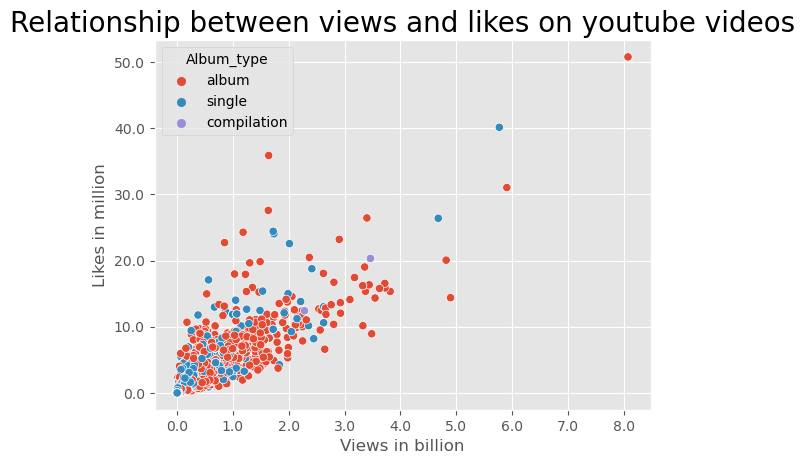

In [15]:
fig = sns.scatterplot(df,x='Views',y='Likes',hue='Album_type')
fig.yaxis.set_major_formatter(millformatter)
fig.yaxis.set_minor_formatter(NullFormatter())
fig.set_ylabel("Likes in million")

fig.xaxis.set_major_formatter(formatter)
fig.xaxis.set_minor_formatter(NullFormatter())
fig.set_xlabel("Views in billion")
fig.set_title("Relationship between views and likes on youtube videos",fontsize=20)

## Lets see relationship between variable views on youtube and stream on Spotify

Text(0.5, 1.0, 'Relationship between views on both platforms')

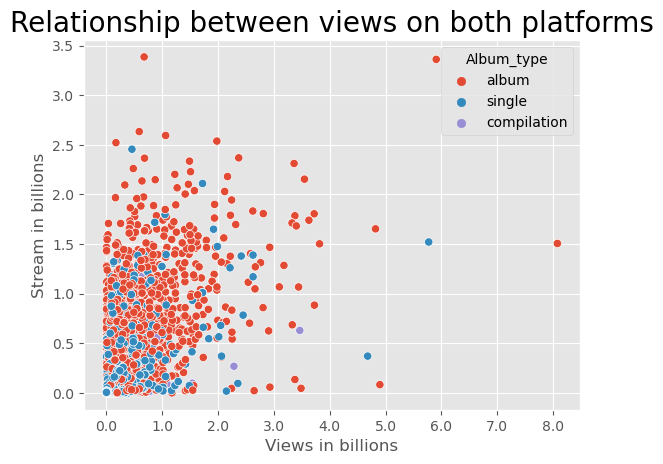

In [16]:
fig = sns.scatterplot(df,x='Views',y='Stream',hue='Album_type')
fig.yaxis.set_major_formatter(formatter)
fig.yaxis.set_minor_formatter(NullFormatter())
fig.set_ylabel("Stream in billions")

fig.xaxis.set_major_formatter(formatter)
fig.xaxis.set_minor_formatter(NullFormatter())
fig.set_xlabel("Views in billions")
fig.set_title("Relationship between views on both platforms",fontsize=20)

## Lets see the relationship between duration and views

In [17]:
df_duration = df 
df_duration['Duration_ms'] = (df_duration['Duration_ms']/1000)/60
# Mili second to  minutes

Text(0.5, 1.0, 'Relationship between duration views')

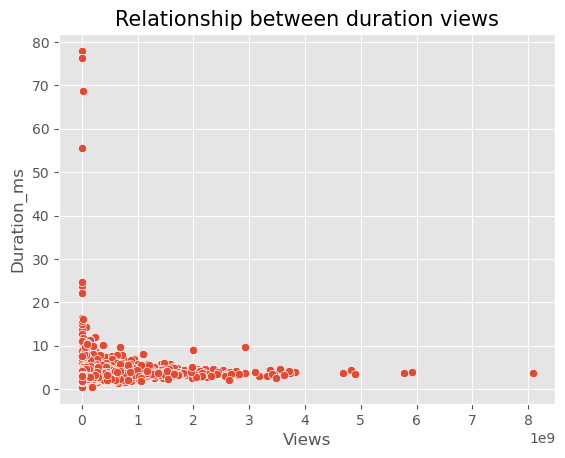

In [18]:
fig = sns.scatterplot(df_duration,y='Duration_ms',x='Views')
fig.set_title("Relationship between duration views",fontsize=15)

# Model to predict views

## Lets see what features that have good relationship with variable stream,views and likes

In [19]:
features = """Danceability
Energy
Key
Loudness
Speechiness
Acousticness
Instrumentalness
Liveness
Valence
Tempo
Duration_ms
Stream
Views
Likes"""
features = features.split('\n')
features

['Danceability',
 'Energy',
 'Key',
 'Loudness',
 'Speechiness',
 'Acousticness',
 'Instrumentalness',
 'Liveness',
 'Valence',
 'Tempo',
 'Duration_ms',
 'Stream',
 'Views',
 'Likes']

<AxesSubplot:>

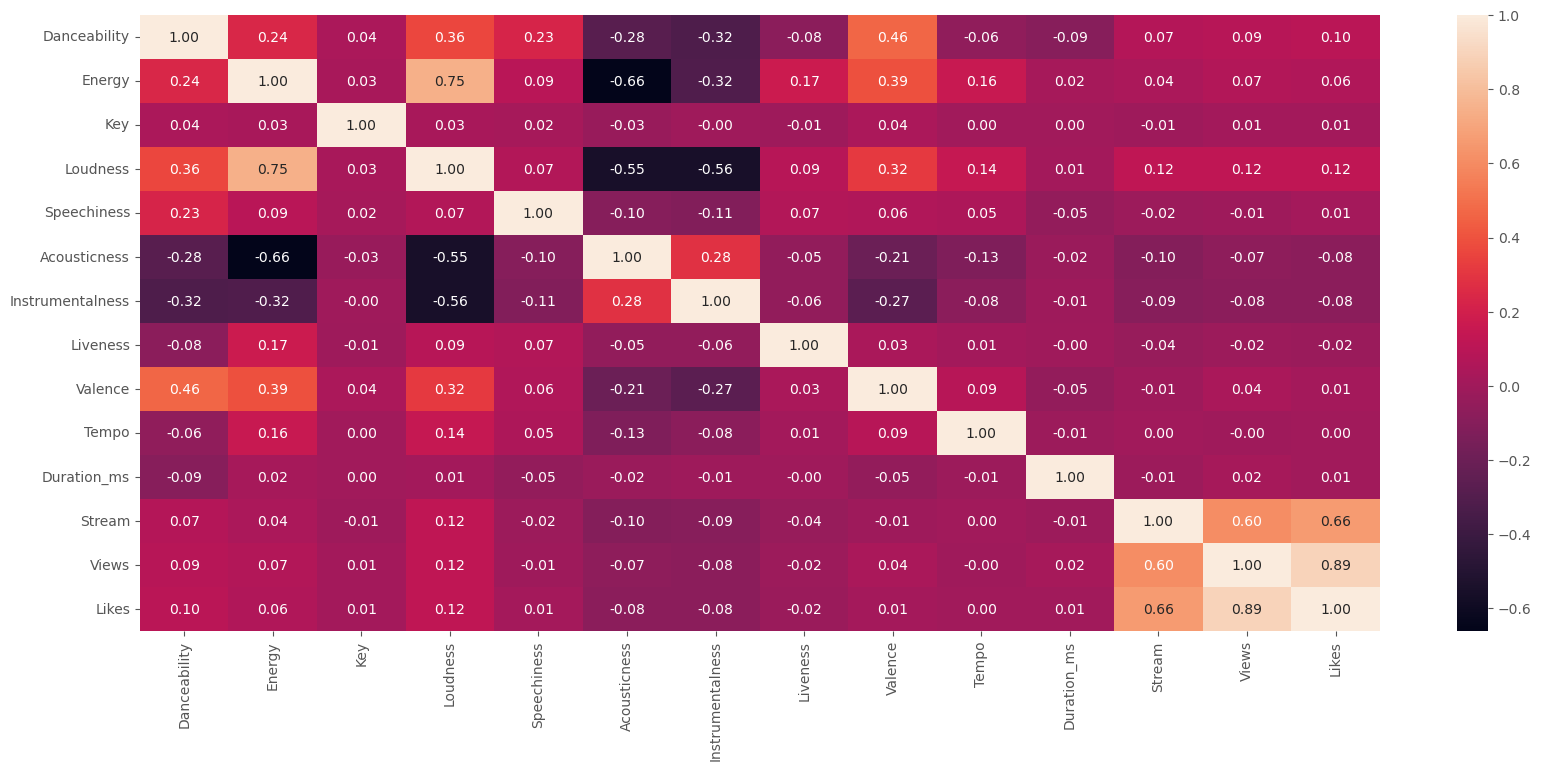

In [20]:
df_feat = df[features]
corr_df = df_feat.corr()
fig = plt.figure(figsize=(20,8))
sns.heatmap(corr_df,annot=True,fmt='.2f')

In [21]:
abs(corr_df['Views']).sort_values(ascending=False)[3:]

Loudness            0.118406
Danceability        0.089105
Instrumentalness    0.080820
Acousticness        0.069905
Energy              0.066530
Valence             0.038699
Duration_ms         0.021547
Liveness            0.017140
Key                 0.009293
Speechiness         0.008672
Tempo               0.001373
Name: Views, dtype: float64

In [22]:
abs(corr_df['Likes']).sort_values(ascending=False)[3:]

Loudness            0.123731
Danceability        0.099296
Instrumentalness    0.081171
Acousticness        0.078123
Energy              0.061980
Liveness            0.023562
Speechiness         0.014429
Valence             0.013986
Key                 0.007948
Duration_ms         0.005841
Tempo               0.002287
Name: Likes, dtype: float64

In [23]:
abs(corr_df['Stream']).sort_values(ascending=False)[3:]

Loudness            0.118746
Acousticness        0.104716
Instrumentalness    0.092336
Danceability        0.072299
Energy              0.044376
Liveness            0.037141
Speechiness         0.015688
Duration_ms         0.012600
Valence             0.011480
Key                 0.006250
Tempo               0.002584
Name: Stream, dtype: float64

## Here im just creating simple model of XGBoost because from the correlation matrix itself. It can be seen that the feature cant be used for this prediction

In [24]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42,subsample=1,min_child_weight=5,
                            max_depth=5,gamma=5,colsample_bytree=0.6)

In [25]:
from sklearn import preprocessing
X = df_feat.drop(columns=['Views','Stream','Likes'],axis=1)
y = df_feat['Views']
std_scaler = preprocessing.StandardScaler()

X_std = std_scaler.fit_transform(X)
# y_std = std_scaler.fit_transform(y)

scores = cross_val_score(xgb_model, X_std, y, scoring="r2", cv=5)

scores

array([ 0.02140714, -0.97816997,  0.06270226,  0.0817503 , -0.02793404])